In [1]:
from qiskit import * 
from qiskit.tools.visualization import plot_histogram

In [2]:
%matplotlib inline

In [3]:
SECRET_NUMBER = "101001"

In [4]:
circuit = QuantumCircuit(6+1, 6)

circuit.h([0, 1, 2, 3, 4, 5])

circuit.x(6)
circuit.h(6)

In [6]:
circuit.barrier()

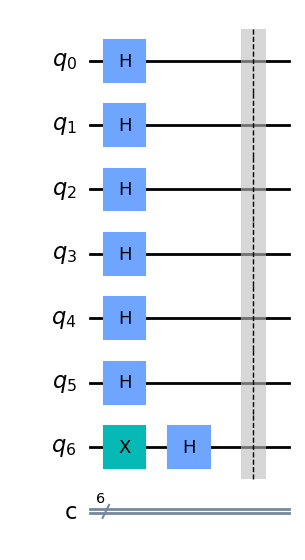

In [7]:
circuit.draw(output="mpl")

## now we should create a box contiane secter number

In [8]:
circuit.cx(5, 6)
circuit.cx(3, 6)
circuit.cx(0, 6)

In [9]:
circuit.barrier()

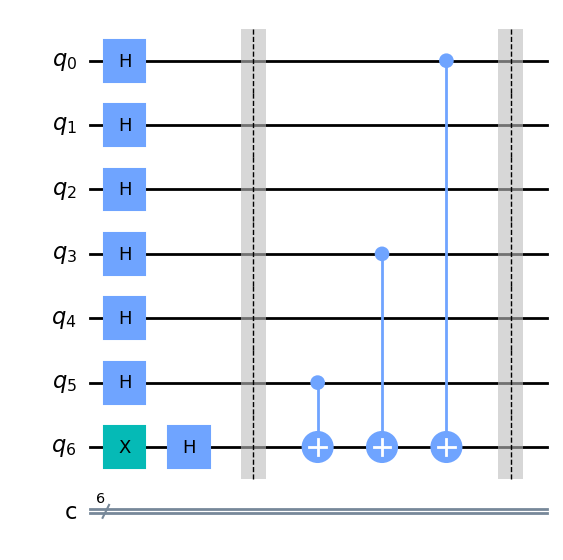

In [10]:
circuit.draw(output="mpl")

In [11]:
circuit.h([0, 1, 2, 3, 4, 5])
circuit.barrier()
circuit.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

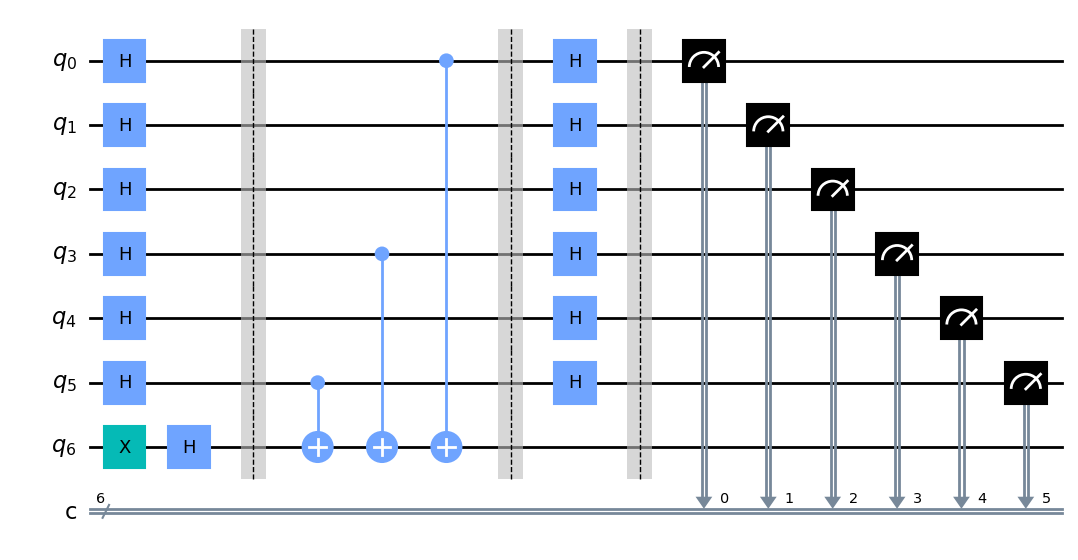

In [12]:
circuit.draw(output="mpl")

## circuit is done 
### now we should simulate circuit to see it is workking or not

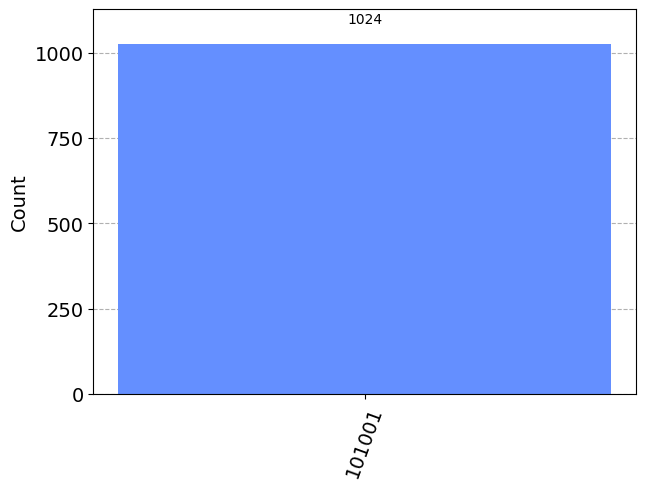

In [15]:
simultor = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend = simultor, shot = 2000).result()
counts = result.get_counts()
plot_histogram(counts)

# now we should generalize our code to be able run it on any secret number

enter secret number100111110


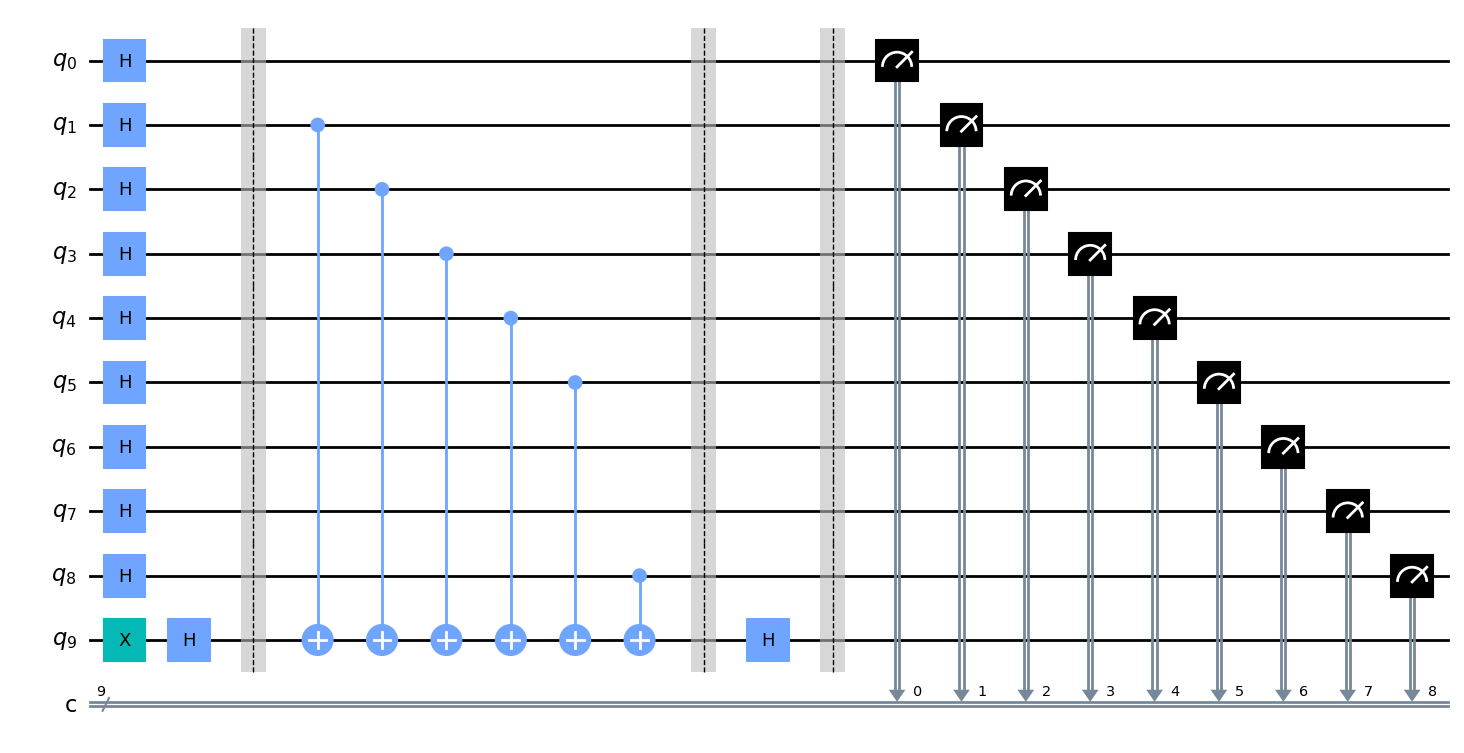

In [16]:
secret_num = input('enter secret number')# only in 0 and 1

circuit = QuantumCircuit(len(secret_num)+1, len(secret_num))

circuit.h(range(len(secret_num)))

circuit.x(len(secret_num))
circuit.h(len(secret_num))
circuit.barrier()

for index, control in enumerate(reversed(secret_num)):
    if control == "1": 
        circuit.cx(index, len(secret_num))

circuit.barrier()

circuit.h(len(secret_num))
circuit.barrier()
circuit.measure(range(len(secret_num)), range(len(secret_num)))


circuit.draw(output="mpl")